### Multivariate_Analysis_Milk_Spectra_Data

* This is a work where multivariate analysis is carried out on the milk spectra data set.

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_t,f
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [310]:
alldata = pd.read_csv("Milk_MIR_Traits_data_2023.csv")

In [311]:
alldata.columns

Index(['Breed', 'Date_of_sampling', 'Parity', 'Milking_Time', 'DaysInMilk',
       'Protein_content', 'kappa_casein', 'alpha_s2_casein', 'alpha_s1_casein',
       'beta_casein',
       ...
       '3788', '3791', '3795', '3799', '3803', '3807', '3811', '3815', '3818',
       '3822'],
      dtype='object', length=582)

* The initial columns contain  details (i.e. covariates) of the cows which produced the milk samples and the protein and technological traits of the milk samples measured in the laboratory. 
* The data in the final 531 columns are the MIR spectra, with the first row of these columns detailing the wavenumber (measured in cm−1). 
* The spectral values in the dataset are the absorbance values (the log10 of the reciprocal of the transmittance value). 

In [312]:
alldata

,Breed,Date_of_sampling,Parity,Milking_Time,DaysInMilk,Protein_content,kappa_casein,alpha_s2_casein,alpha_s1_casein,beta_casein,...,3788,3791,3795,3799,3803,3807,3811,3815,3818,3822
0,Hol Fri,20/08/2013,5.0,1.0,197.0,3.35,5.30620,3.129512,12.09580,9.70916,...,0.028741,0.029182,0.029620,0.030060,0.030488,0.030874,0.031192,0.031433,0.031607,0.031742
1,Hol Fri,20/08/2013,5.0,1.0,203.0,3.48,6.10762,3.722658,12.63136,11.07848,...,0.012581,0.013158,0.013705,0.014237,0.014758,0.015258,0.015720,0.016129,0.016478,0.016773
2,JEX-,20/08/2013,5.0,1.0,193.0,3.61,7.05540,0.657284,12.47792,11.48780,...,0.027213,0.027730,0.028210,0.028658,0.029079,0.029473,0.029837,0.030162,0.030445,0.030686
3,FRX-,20/08/2013,4.0,1.0,119.0,3.64,8.28818,6.145520,21.83550,17.22150,...,0.035717,0.036143,0.036553,0.036960,0.037364,0.037747,0.038090,0.038380,0.038615,0.038807
4,JEX-,20/08/2013,5.0,1.0,206.0,4.20,7.30404,4.022390,16.78622,14.34638,...,0.020784,0.021316,0.021844,0.022381,0.022926,0.023459,0.023956,0.024391,0.024753,0.025048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,JE,05/08/2014,1.0,2.0,165.0,4.32,5.82630,3.439646,15.83054,14.76752,...,0.016813,0.017629,0.018281,0.018822,0.019324,0.019847,0.020419,0.021027,0.021631,0.022183
427,JE,05/08/2014,2.0,2.0,181.0,4.40,6.52646,3.880494,15.32890,14.43082,...,0.013539,0.014434,0.015311,0.016143,0.016897,0.017553,0.018114,0.018608,0.019071,0.019532
428,Hol Fri,05/08/2014,1.0,2.0,181.0,3.82,7.71276,4.309004,17.03872,16.44630,...,0.015505,0.016247,0.016924,0.017535,0.018084,0.018571,0.018993,0.019352,0.019658,0.019942
429,JE,05/08/2014,1.0,2.0,123.0,3.77,6.00250,3.129922,12.21120,11.90004,...,0.012216,0.013149,0.013987,0.014691,0.015234,0.015619,0.015888,0.016124,0.016419,0.016840


***Remove rows for which betaLactB is NA***


In [313]:
pd.isna(alldata['beta_lactoglobulin_b']).sum()

125

In [314]:
mask = pd.isna(alldata['beta_lactoglobulin_b'])
ind = mask.index[mask].tolist()

In [315]:
alldata = alldata.drop(ind)

In [316]:
alldata

,Breed,Date_of_sampling,Parity,Milking_Time,DaysInMilk,Protein_content,kappa_casein,alpha_s2_casein,alpha_s1_casein,beta_casein,...,3788,3791,3795,3799,3803,3807,3811,3815,3818,3822
0,Hol Fri,20/08/2013,5.0,1.0,197.0,3.35,5.30620,3.129512,12.09580,9.70916,...,0.028741,0.029182,0.029620,0.030060,0.030488,0.030874,0.031192,0.031433,0.031607,0.031742
1,Hol Fri,20/08/2013,5.0,1.0,203.0,3.48,6.10762,3.722658,12.63136,11.07848,...,0.012581,0.013158,0.013705,0.014237,0.014758,0.015258,0.015720,0.016129,0.016478,0.016773
2,JEX-,20/08/2013,5.0,1.0,193.0,3.61,7.05540,0.657284,12.47792,11.48780,...,0.027213,0.027730,0.028210,0.028658,0.029079,0.029473,0.029837,0.030162,0.030445,0.030686
3,FRX-,20/08/2013,4.0,1.0,119.0,3.64,8.28818,6.145520,21.83550,17.22150,...,0.035717,0.036143,0.036553,0.036960,0.037364,0.037747,0.038090,0.038380,0.038615,0.038807
4,JEX-,20/08/2013,5.0,1.0,206.0,4.20,7.30404,4.022390,16.78622,14.34638,...,0.020784,0.021316,0.021844,0.022381,0.022926,0.023459,0.023956,0.024391,0.024753,0.025048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,JE,05/08/2014,1.0,2.0,165.0,4.32,5.82630,3.439646,15.83054,14.76752,...,0.016813,0.017629,0.018281,0.018822,0.019324,0.019847,0.020419,0.021027,0.021631,0.022183
427,JE,05/08/2014,2.0,2.0,181.0,4.40,6.52646,3.880494,15.32890,14.43082,...,0.013539,0.014434,0.015311,0.016143,0.016897,0.017553,0.018114,0.018608,0.019071,0.019532
428,Hol Fri,05/08/2014,1.0,2.0,181.0,3.82,7.71276,4.309004,17.03872,16.44630,...,0.015505,0.016247,0.016924,0.017535,0.018084,0.018571,0.018993,0.019352,0.019658,0.019942
429,JE,05/08/2014,1.0,2.0,123.0,3.77,6.00250,3.129922,12.21120,11.90004,...,0.012216,0.013149,0.013987,0.014691,0.015234,0.015619,0.015888,0.016124,0.016419,0.016840


***Extracting the spectral data***

In [317]:
p = 531
spectra = alldata.iloc[:, -p:].values
spectra

array([[-0.06545495, -0.06240179, -0.05955476, ...,  0.03143268,
         0.03160661,  0.03174203],
       [-0.05964402, -0.05561379, -0.05227269, ...,  0.01612933,
         0.01647775,  0.01677314],
       [-0.06794361, -0.06390643, -0.06025931, ...,  0.03016244,
         0.03044542,  0.03068634],
       ...,
       [-0.09127736, -0.08738099, -0.08322617, ...,  0.0193516 ,
         0.01965847,  0.01994183],
       [-0.09753456, -0.09284738, -0.08833794, ...,  0.01612389,
         0.0164192 ,  0.01684003],
       [-0.08887936, -0.08416548, -0.07962168, ...,  0.01501249,
         0.01553198,  0.01599955]])

In [318]:
spectra.shape

(306, 531)

In [319]:
type(spectra)

numpy.ndarray

In [320]:
wavel = alldata.columns[-p:]

In [321]:
betaLactB = alldata["beta_lactoglobulin_b"]

In [322]:
type(betaLactB)

pandas.core.series.Series

In [323]:
milk_df_1 = pd.DataFrame({'spectra': spectra.tolist(), 'betaLactB': betaLactB}).reset_index(drop= True)
milk_df_1

,spectra,betaLactB
0,"[-0.065454953, -0.062401792, -0.059554758, -0....",2.455808
1,"[-0.059644024, -0.055613788, -0.052272688, -0....",5.167320
2,"[-0.067943613, -0.063906434, -0.060259311, -0....",1.357786
3,"[-0.072800712, -0.069666062, -0.066523199, -0....",0.000000
4,"[-0.060372406, -0.060048003, -0.059209146, -0....",2.989430
...,...,...
301,"[-0.111052664, -0.105898196, -0.100547687, -0....",2.771258
302,"[-0.106934047, -0.101993001, -0.097144276, -0....",2.583168
303,"[-0.091277358, -0.08738099, -0.083226167, -0.0...",3.364814
304,"[-0.097534557, -0.092847378, -0.08833794, -0.0...",4.190100


In [324]:
type(milk_df_1['betaLactB'])

pandas.core.series.Series

In [325]:
spectra_df = pd.DataFrame(data=spectra, columns=alldata.columns[-p:])

In [326]:
milk_df_2 = spectra_df.copy()
milk_df_2['betaLactB'] = milk_df_1['betaLactB']

In [327]:
milk_df_2

,941,945,949,953,957,960,964,968,972,976,...,3791,3795,3799,3803,3807,3811,3815,3818,3822,betaLactB
0,-0.065455,-0.062402,-0.059555,-0.057033,-0.054845,-0.052844,-0.050672,-0.047758,-0.043415,-0.037045,...,0.029182,0.029620,0.030060,0.030488,0.030874,0.031192,0.031433,0.031607,0.031742,2.455808
1,-0.059644,-0.055614,-0.052273,-0.049886,-0.048359,-0.047277,-0.045985,-0.043703,-0.039672,-0.033335,...,0.013158,0.013705,0.014237,0.014758,0.015258,0.015720,0.016129,0.016478,0.016773,5.167320
2,-0.067944,-0.063906,-0.060259,-0.057295,-0.055065,-0.053336,-0.051574,-0.049009,-0.044795,-0.038246,...,0.027730,0.028210,0.028658,0.029079,0.029473,0.029837,0.030162,0.030445,0.030686,1.357786
3,-0.072801,-0.069666,-0.066523,-0.063599,-0.060999,-0.058635,-0.056160,-0.052981,-0.048373,-0.041686,...,0.036143,0.036553,0.036960,0.037364,0.037747,0.038090,0.038380,0.038615,0.038807,0.000000
4,-0.060372,-0.060048,-0.059209,-0.058003,-0.056603,-0.055024,-0.052997,-0.049964,-0.045219,-0.038147,...,0.021316,0.021844,0.022381,0.022926,0.023459,0.023956,0.024391,0.024753,0.025048,2.989430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.111053,-0.105898,-0.100548,-0.095194,-0.090028,-0.085125,-0.080337,-0.075236,-0.069177,-0.061485,...,0.017629,0.018281,0.018822,0.019324,0.019847,0.020419,0.021027,0.021631,0.022183,2.771258
302,-0.106934,-0.101993,-0.097144,-0.092426,-0.087878,-0.083463,-0.078970,-0.073950,-0.067767,-0.059775,...,0.014434,0.015311,0.016143,0.016897,0.017553,0.018114,0.018608,0.019071,0.019532,2.583168
303,-0.091277,-0.087381,-0.083226,-0.078978,-0.074814,-0.070806,-0.066816,-0.062440,-0.057073,-0.050083,...,0.016247,0.016924,0.017535,0.018084,0.018571,0.018993,0.019352,0.019658,0.019942,3.364814
304,-0.097535,-0.092847,-0.088338,-0.084124,-0.080261,-0.076671,-0.073062,-0.068897,-0.063465,-0.056083,...,0.013149,0.013987,0.014691,0.015234,0.015619,0.015888,0.016124,0.016419,0.016840,4.190100


### MIR Spectra Visualization

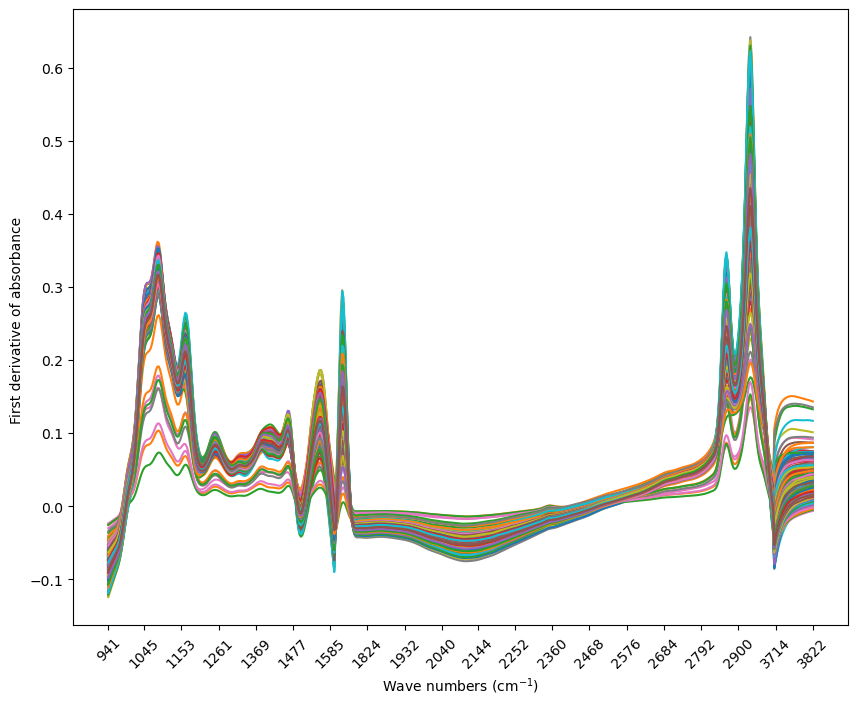

In [328]:
plt.figure(figsize=(10,8))
plt.plot(np.transpose(milk_df_2.iloc[:, :p].values))
plt.xlabel("Wave numbers (cm$^{-1}$)")
plt.ylabel("First derivative of absorbance ")
ind = np.linspace(0, spectra_df.shape[1]-1, num=20, dtype=int)
plt.xticks(ind, wavel[ind], rotation=45)
plt.show()

* The absorbance varies randomly as the wavenumbers increase till the wavenumber reaches around 1800.
* For wavenumbers from 1800 to around 2800, the absorbance value increases steadily.
* At wavenumbers of around 3000, the absorbance values are at is maximum.
* For 3500 and above wavenumbers, the absorbance values are in the same range.

### Frequency distribution of protein B_lactoglobulin values

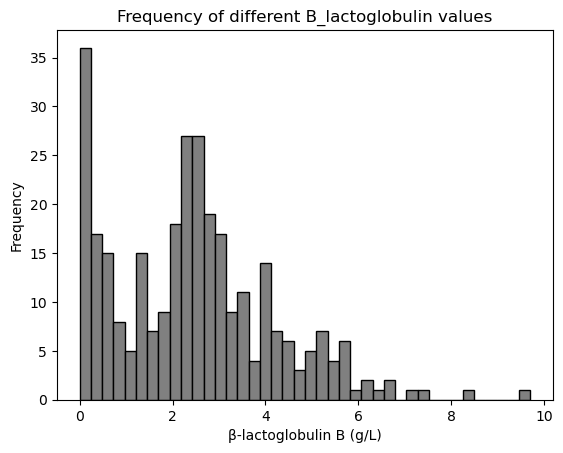

In [329]:
plt.hist(alldata['beta_lactoglobulin_b'], bins=40, color='grey',edgecolor = 'black')
plt.xlabel('β-lactoglobulin B (g/L)')
plt.ylabel('Frequency')
plt.title('Frequency of different B_lactoglobulin values')
plt.show()

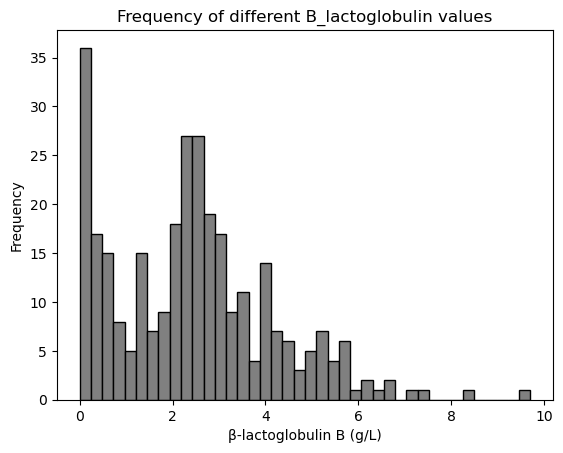

In [330]:
plt.hist(milk_df_2['betaLactB'], bins=40, color='grey',edgecolor = 'black')
plt.xlabel('β-lactoglobulin B (g/L)')
plt.ylabel('Frequency')
plt.title('Frequency of different B_lactoglobulin values')
plt.show()

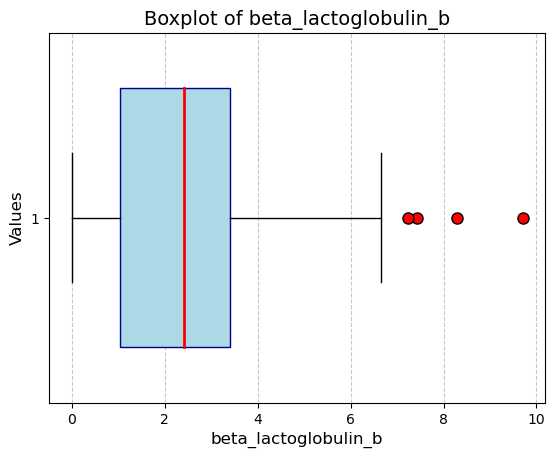

In [331]:
plt.boxplot(alldata['beta_lactoglobulin_b'],
            vert=False,  
            widths=0.7,  
            patch_artist=True,  
            boxprops=dict(facecolor='lightblue', color='darkblue'),  
            capprops=dict(color='black'),  
            whiskerprops=dict(color='black'), 
            medianprops=dict(color='red', linewidth=2),  
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8),  
            )

plt.xlabel('beta_lactoglobulin_b', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Boxplot of beta_lactoglobulin_b', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  

plt.show()

* The median of beta_lactoglobulin_b value is around 2.4
* Its values range from 0 to around 10.
* Most of the values are in the range 1 to 3.

#### Dealing with Outliers

In [332]:
sigma = 3
mean_betaLactB = milk_df_1['betaLactB'].mean(skipna=True)
std_betaLactB = milk_df_1['betaLactB'].std(skipna=True)
upper = mean_betaLactB + sigma * std_betaLactB
lower = mean_betaLactB - sigma * std_betaLactB
ind = milk_df_1[(milk_df_1['betaLactB'] < lower) | (milk_df_1['betaLactB'] > upper)].index
milk_df_1 = milk_df_1.drop(ind)

In [333]:
milk_df_1.reset_index(drop=True,inplace=True)
milk_df_1

,spectra,betaLactB
0,"[-0.065454953, -0.062401792, -0.059554758, -0....",2.455808
1,"[-0.059644024, -0.055613788, -0.052272688, -0....",5.167320
2,"[-0.067943613, -0.063906434, -0.060259311, -0....",1.357786
3,"[-0.072800712, -0.069666062, -0.066523199, -0....",0.000000
4,"[-0.060372406, -0.060048003, -0.059209146, -0....",2.989430
...,...,...
299,"[-0.111052664, -0.105898196, -0.100547687, -0....",2.771258
300,"[-0.106934047, -0.101993001, -0.097144276, -0....",2.583168
301,"[-0.091277358, -0.08738099, -0.083226167, -0.0...",3.364814
302,"[-0.097534557, -0.092847378, -0.08833794, -0.0...",4.190100


In [334]:
sigma = 3
mean_betaLactB = milk_df_2['betaLactB'].mean(skipna=True)
std_betaLactB = milk_df_2['betaLactB'].std(skipna=True)
upper = mean_betaLactB + sigma * std_betaLactB
lower = mean_betaLactB - sigma * std_betaLactB
ind = milk_df_2[(milk_df_2['betaLactB'] < lower) | (milk_df_2['betaLactB'] > upper)].index
milk_df_2 = milk_df_2.drop(ind)

In [335]:
milk_df_2.reset_index(drop=True, inplace=True)
milk_df_2

,941,945,949,953,957,960,964,968,972,976,...,3791,3795,3799,3803,3807,3811,3815,3818,3822,betaLactB
0,-0.065455,-0.062402,-0.059555,-0.057033,-0.054845,-0.052844,-0.050672,-0.047758,-0.043415,-0.037045,...,0.029182,0.029620,0.030060,0.030488,0.030874,0.031192,0.031433,0.031607,0.031742,2.455808
1,-0.059644,-0.055614,-0.052273,-0.049886,-0.048359,-0.047277,-0.045985,-0.043703,-0.039672,-0.033335,...,0.013158,0.013705,0.014237,0.014758,0.015258,0.015720,0.016129,0.016478,0.016773,5.167320
2,-0.067944,-0.063906,-0.060259,-0.057295,-0.055065,-0.053336,-0.051574,-0.049009,-0.044795,-0.038246,...,0.027730,0.028210,0.028658,0.029079,0.029473,0.029837,0.030162,0.030445,0.030686,1.357786
3,-0.072801,-0.069666,-0.066523,-0.063599,-0.060999,-0.058635,-0.056160,-0.052981,-0.048373,-0.041686,...,0.036143,0.036553,0.036960,0.037364,0.037747,0.038090,0.038380,0.038615,0.038807,0.000000
4,-0.060372,-0.060048,-0.059209,-0.058003,-0.056603,-0.055024,-0.052997,-0.049964,-0.045219,-0.038147,...,0.021316,0.021844,0.022381,0.022926,0.023459,0.023956,0.024391,0.024753,0.025048,2.989430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.111053,-0.105898,-0.100548,-0.095194,-0.090028,-0.085125,-0.080337,-0.075236,-0.069177,-0.061485,...,0.017629,0.018281,0.018822,0.019324,0.019847,0.020419,0.021027,0.021631,0.022183,2.771258
300,-0.106934,-0.101993,-0.097144,-0.092426,-0.087878,-0.083463,-0.078970,-0.073950,-0.067767,-0.059775,...,0.014434,0.015311,0.016143,0.016897,0.017553,0.018114,0.018608,0.019071,0.019532,2.583168
301,-0.091277,-0.087381,-0.083226,-0.078978,-0.074814,-0.070806,-0.066816,-0.062440,-0.057073,-0.050083,...,0.016247,0.016924,0.017535,0.018084,0.018571,0.018993,0.019352,0.019658,0.019942,3.364814
302,-0.097535,-0.092847,-0.088338,-0.084124,-0.080261,-0.076671,-0.073062,-0.068897,-0.063465,-0.056083,...,0.013149,0.013987,0.014691,0.015234,0.015619,0.015888,0.016124,0.016419,0.016840,4.190100


* Removed any observations with β Lactoglobulin B outside of 3 standard deviations from the mean of the trait. 

### Clustering Algorithms

***We will perform Hierarchical and K-Means Clustering and try to see what works best for our dataset***

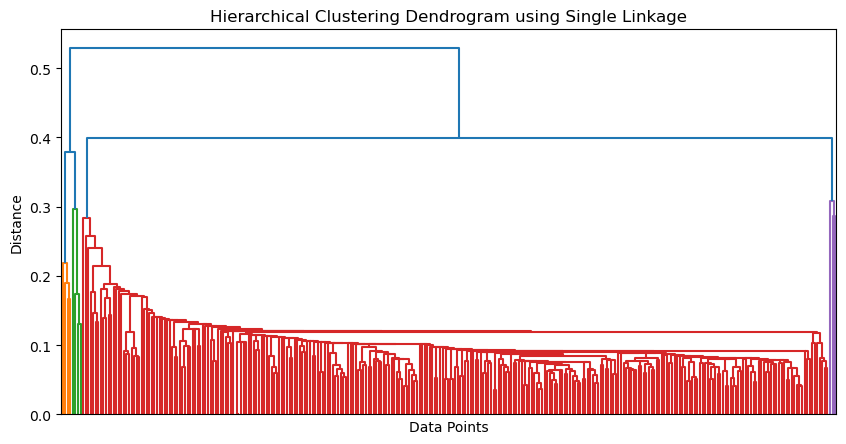

In [336]:
distances_single = linkage(milk_df_2.iloc[:, :p], method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(distances_single, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram using Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

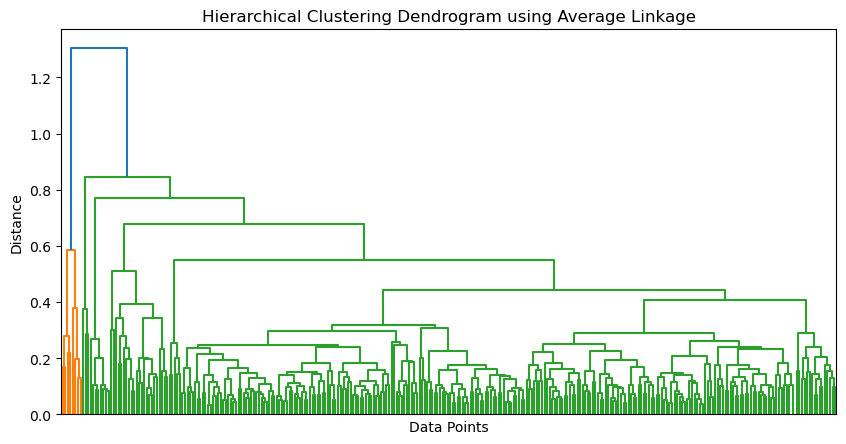

In [337]:
distances_avg = linkage(milk_df_2.iloc[:, :p], method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(distances_avg, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram using Average Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

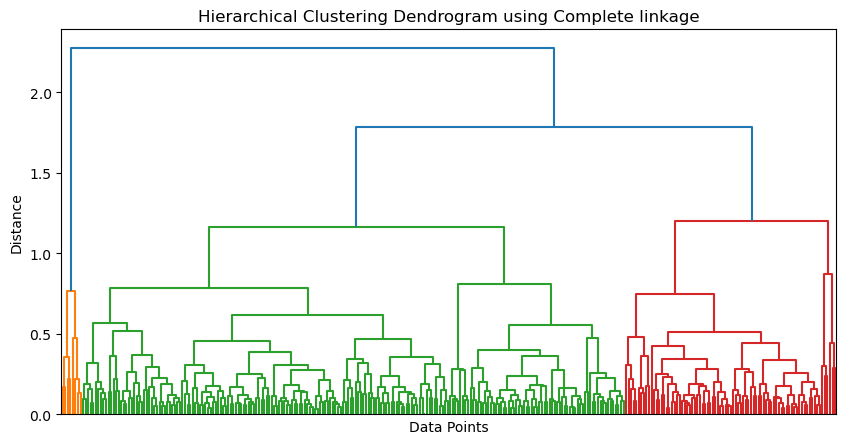

In [338]:
distances_complete = linkage(milk_df_2.iloc[:, :p], method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(distances_complete, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram using Complete linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [339]:
# Assign cluster labels
cl_hier_3 = fcluster(distances_complete, t=3, criterion='maxclust')

unique_labels, label_counts = np.unique(cl_hier_3, return_counts=True)

# Display the count of data points in each cluster
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count}")


Cluster 1: 8
Cluster 2: 213
Cluster 3: 83


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

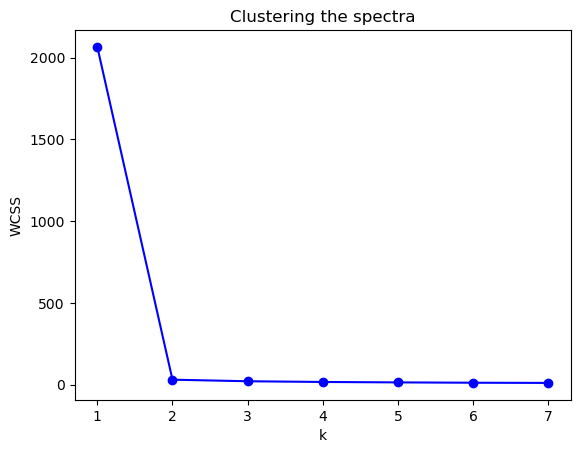

In [340]:
n = spectra_df.shape[0]  # Number of data points
WCSS = np.zeros(7)  # Initialize WCSS array

# Calculate WCSS for k = 1
WCSS[0] = (n - 1) * (np.cov(milk_df_2.iloc[:, :p], rowvar=False, bias=True)).sum()

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(milk_df_2.iloc[:, :p])
    WCSS[k-1] = np.sum(kmeans.inertia_)

plt.plot(range(1, 8), WCSS, 'bo-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Clustering the spectra')
plt.show()


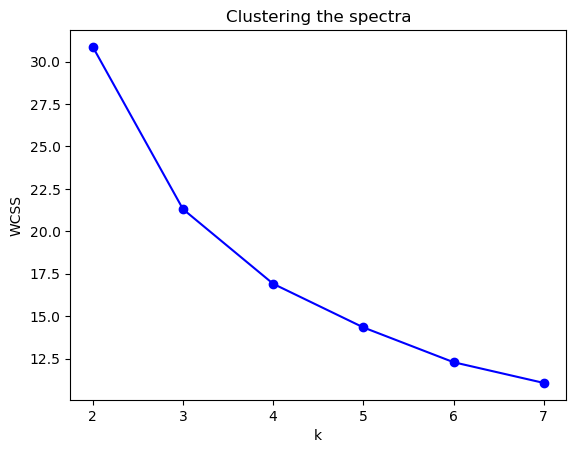

In [341]:
plt.plot(range(2, 8), WCSS[1:], 'bo-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Clustering the spectra')
plt.show()

In [342]:

kmeans_3 = KMeans(n_clusters=3)
cl_kmeans_3 = kmeans_3.fit_predict(milk_df_2.iloc[:, :p])


kmeans_5 = KMeans(n_clusters=5)
cl_kmeans_5 = kmeans_5.fit_predict(milk_df_2.iloc[:, :p])


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [343]:
unique_labels, label_counts = np.unique(cl_kmeans_3, return_counts=True)
unique_labels = unique_labels+1
# Display the count of data points in each cluster
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count}")



Cluster 1: 143
Cluster 2: 153
Cluster 3: 8


In [344]:
unique_labels, label_counts = np.unique(cl_kmeans_5, return_counts=True)


# Display the count of data points in each cluster
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count}")


Cluster 0: 96
Cluster 1: 57
Cluster 2: 104
Cluster 3: 8
Cluster 4: 39


In [345]:
pd.crosstab(cl_hier_3,cl_kmeans_3 )

col_0,0,1,2
row_0,,,
1,0,0,8
2,60,153,0
3,83,0,0


In [346]:
ari_hier_km_3= adjusted_rand_score(cl_hier_3, cl_kmeans_3)

print(ari_hier_km_3)


0.3892813940569812


In [347]:
pd.crosstab(cl_hier_3, cl_kmeans_5 )

col_0,0,1,2,3,4
row_0,,,,,
1,0,0,0,8,0
2,96,1,84,0,32
3,0,56,20,0,7


In [348]:
ari_hier_km_5= adjusted_rand_score(cl_hier_3, cl_kmeans_5)

print(ari_hier_km_5)

0.2772903269842471


In [349]:
alldata = alldata.drop(ind, axis=0)
column_names = alldata.columns[0:5]

In [350]:
column_names

Index(['Breed', 'Date_of_sampling', 'Parity', 'Milking_Time', 'DaysInMilk'], dtype='object')

In [351]:
pd.crosstab(cl_hier_3, alldata['Breed'])

Breed,FRX-,HOX-,Hol Fri,JE,JEX-,MO,NR
row_0,,,,,,,
1,0,0,6,1,1,0,0
2,11,1,149,31,13,1,7
3,5,2,38,26,10,0,2


In [352]:
adjusted_rand_score(cl_hier_3, alldata['Breed'])

0.09448216610735546

In [353]:
year = [date[6:10] for date in alldata["Date_of_sampling"]]
month = [date[3:5] for date in alldata["Date_of_sampling"]]

In [354]:
pd.crosstab(year, cl_hier_3)

col_0,1,2,3
row_0,,,
2013,1,83,23
2014,7,130,60


In [355]:
adjusted_rand_score(year, cl_hier_3)

-0.02398609941947798

In [356]:
pd.crosstab(month, cl_hier_3)

col_0,1,2,3
row_0,,,
03,5,51,25
04,2,28,8
06,0,23,4
07,0,11,13
08,0,50,12
09,1,39,14
10,0,11,7


In [357]:
adjusted_rand_score(month, cl_hier_3)

0.003186769455965389

In [358]:
pd.crosstab(cl_hier_3, alldata["Parity"])

Parity,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0
row_0,,,,,,,,,,
1,0,4,1,1,0,2,0,0,0,0
2,78,48,28,26,18,6,4,3,1,1
3,22,25,17,7,7,2,1,1,1,0


In [359]:
adjusted_rand_score(cl_hier_3, alldata["Parity"])

0.014108108243048685

In [360]:
pd.crosstab(cl_hier_3, alldata["Milking_Time"])


Milking_Time,1.0,2.0
row_0,,
1,4,4
2,155,58
3,30,53


In [361]:
adjusted_rand_score(cl_hier_3, alldata["Milking_Time"])

0.1468297782110347

* From both the hierarchical clustering and K-Means clustering, we try to see the clustering pattern in our data.
* From the Elbow method, we are confused between 3 and 5 as the number of clusters.
* Thus, we use the ClassAgreement and tab to compare them.
* We find that adjusted rand value is higher when k =3.
* Thus, we can chose 3 as the number of clusters in our data.

#### Visualising distribution of Days in Milk for different Clusters

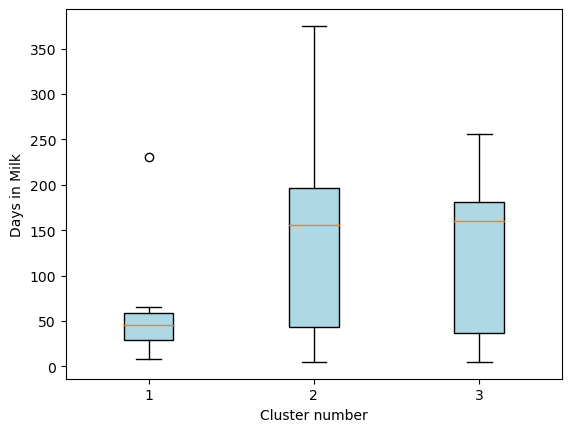

In [362]:
# Create a list of data for each cluster
data = []
for cluster in np.unique(cl_hier_3):
    data.append(alldata.loc[cl_hier_3 == cluster, 'DaysInMilk'])

# Create a boxplot
plt.boxplot(data, labels=np.unique(cl_hier_3), patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

# Set the x and y axis labels
plt.xlabel('Cluster number')
plt.ylabel('Days in Milk')

# Show the plot
plt.show()


* Smallest cluster (cluster 1) contains milk samples from cows who have low values of `days in milk'.

### Visualizing Clusters' mean Spectra 

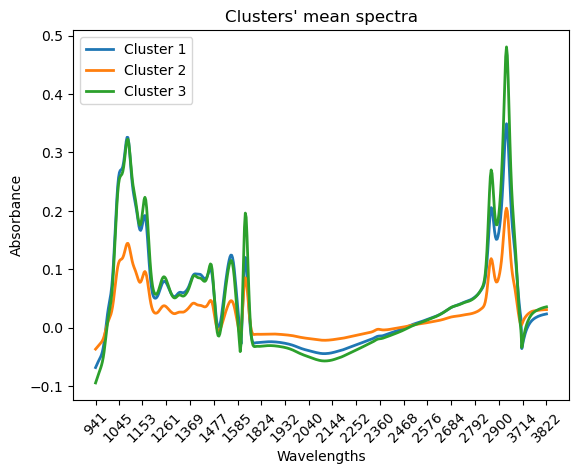

In [363]:
spectra_data = milk_df_2.iloc[:, :p].values
kres_means = np.zeros((3, spectra_data.shape[1]))
for g in range(0, 3):
    kres_means[g-1, :] = np.mean(spectra_data[cl_kmeans_3 == g, :], axis=0)

plt.plot(kres_means.T, lw=2)
plt.xlabel("Wavelengths")
plt.ylabel("Absorbance")
plt.title("Clusters' mean spectra")
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3"])
ind = np.linspace(0, spectra_data.shape[1]-1, num=20, dtype=int)
plt.xticks(ind, wavel[ind], rotation=45)
plt.show()

*  Some differences in means at notable peaks, but hard to draw conclusions from plots.

### Performing PCA for dimensionality reduction

In [364]:
# Perform PCA
pca_res = PCA()
pca_res.fit(spectra_data)

# Calculate the cumulative proportion of variance explained
variance_explained = np.cumsum(pca_res.explained_variance_ratio_)

variance_explained[:10]

array([0.63453463, 0.82340865, 0.95059315, 0.9920381 , 0.99482985,
       0.99638086, 0.99734589, 0.99802821, 0.99845115, 0.99877449])

***We see that first 4 PCs are enough to explain most of the variance*** 

***Plotting the cumulative proportion of the variance explained by the first 10 principal components***

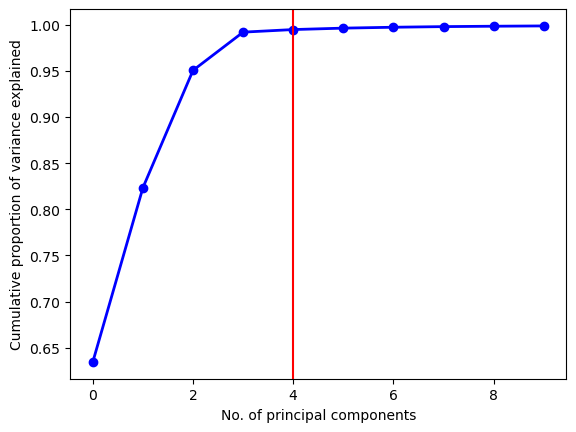

In [365]:
# Plot the cumulative proportion of variance explained
plt.plot(variance_explained[:10], marker='o', linestyle='-', color='blue', linewidth=2)
plt.xlabel('No. of principal components')
plt.ylabel('Cumulative proportion of variance explained')

# Add a vertical line at q
q = 4
plt.axvline(x=q, color='red')

# Show the plot
plt.show()

### Getting the Principal Component Scores and Plotting the clusters we get

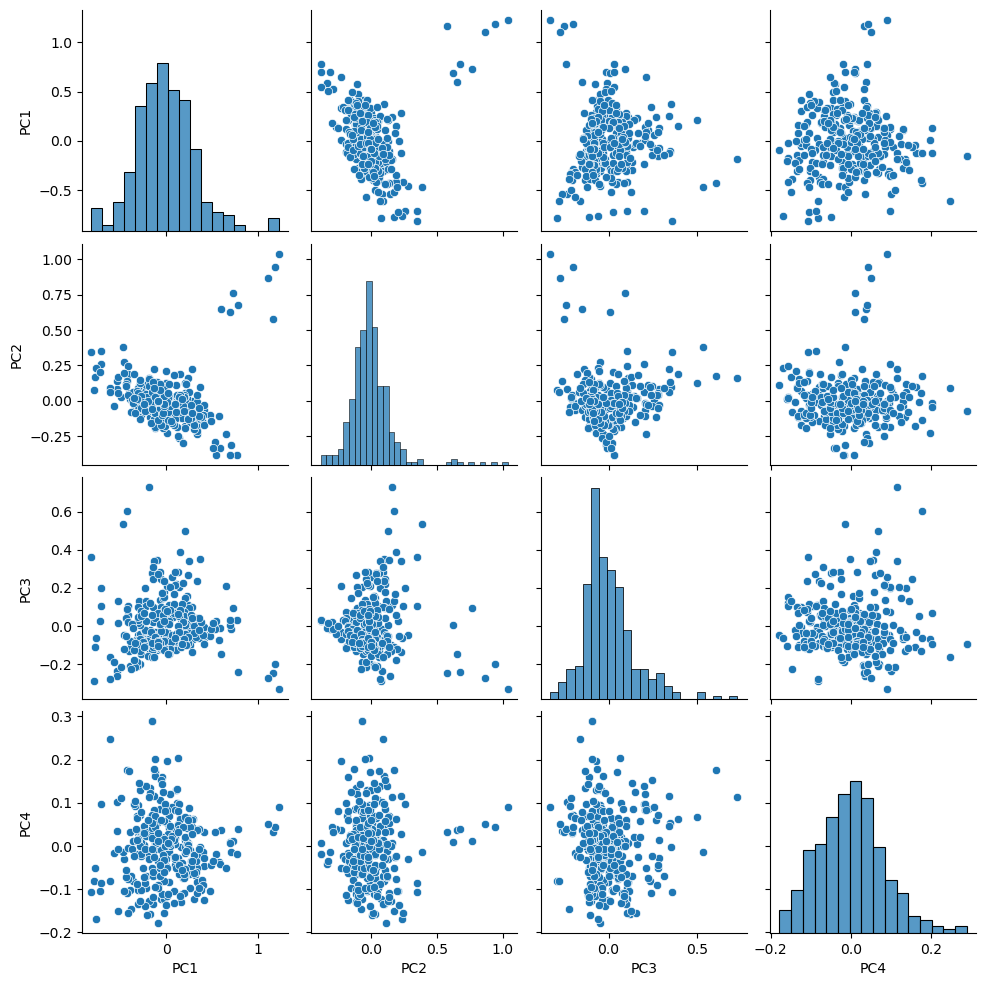

In [366]:
pca = PCA(n_components=4)  # Set the desired number of components
scores = pca.fit_transform(spectra_data)
scores_df = pd.DataFrame(scores[:, :q], columns=[f'PC{i}' for i in range(1, q + 1)])
sns.pairplot(scores_df)

***Comparing the PCA results and Hierarchical Clustering results to see if the outliers from PCA are detected by Clustering***

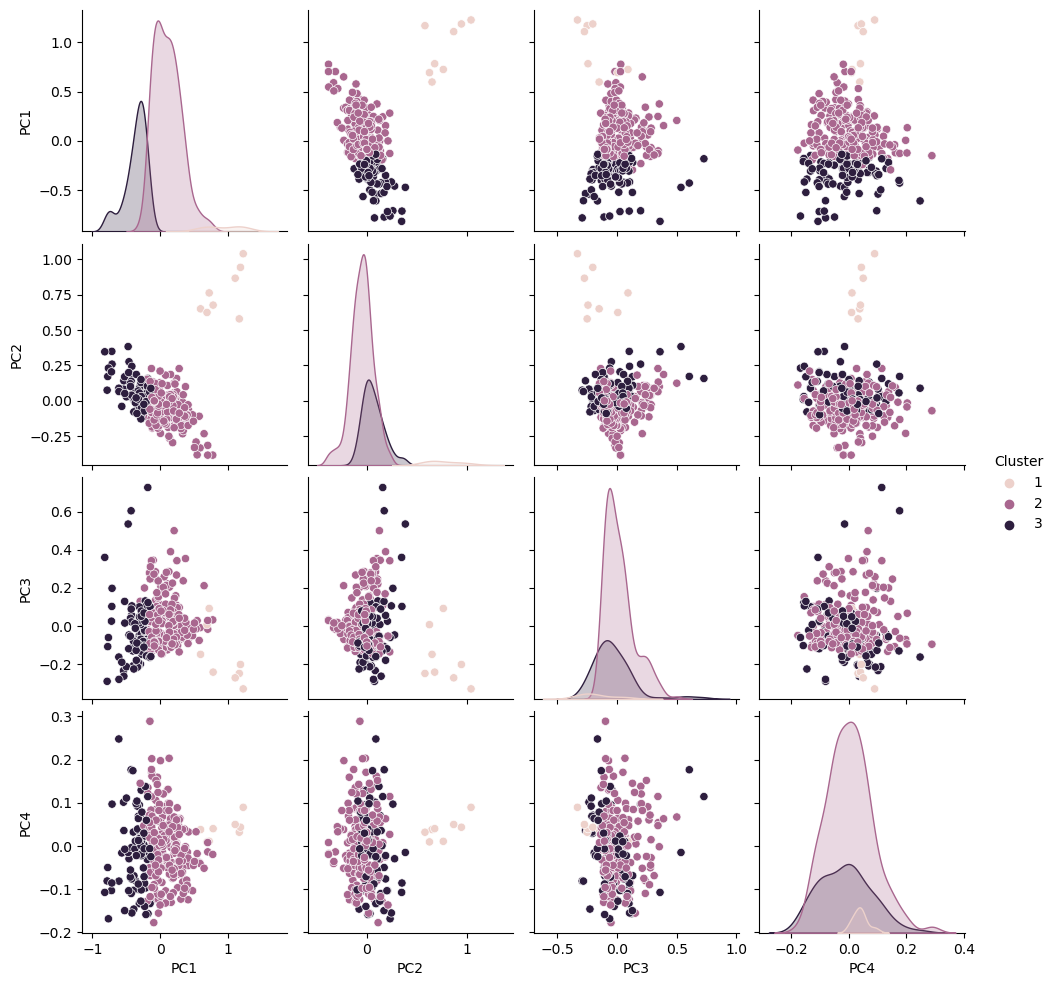

In [367]:
data = pd.concat([scores_df.iloc[:, :4], pd.Series(cl_hier_3, name='Cluster')], axis=1)

# Generate scatterplot matrix
sns.pairplot(data, hue='Cluster')

### Predicting the β Lactoglobulin B trait based on the MIR spectra

* Principal components regression (PCR) is one approach to doing so for such n < p data.
* First we will perform PCA on the explanatory variables to reduce the dimensions.
* Then the required number of principal components(PCs) to explain most of the variability and the relationship with the response variable.
* Then linear regression is fit on the selected PCs

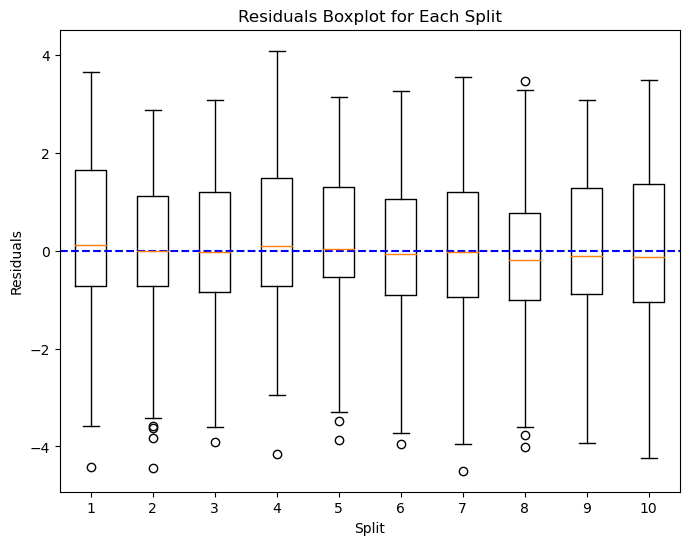

In [368]:
n=304
n_splits = 10  

resids = []
RMSEs = np.zeros(n_splits)

for i in range(n_splits):
    ind_train, ind_test = train_test_split(np.arange(n), test_size=1/3, shuffle=True)
    dat_train = spectra_data[ind_train]
    betaLactB_train = milk_df_2['betaLactB'][ind_train]
    dat_test = spectra_data[ind_test]
    betaLactB_test = milk_df_2['betaLactB'][ind_test]

    pca = PCA(n_components=10)
    X_train = pca.fit_transform(dat_train)
    X_test = pca.transform(dat_test)

    model = LinearRegression()
    model.fit(X_train[:, :5], betaLactB_train)

    preds = model.predict(X_test[:, :5])
    resids.append(preds - betaLactB_test)

    RMSEs[i] = np.sqrt(mean_squared_error(betaLactB_test, preds))

plt.figure(figsize=(8, 6))
plt.boxplot(resids)
plt.axhline(y=0, linestyle='--', color='blue')
plt.xlabel('Split')
plt.ylabel('Residuals')
plt.title('Residuals Boxplot for Each Split')
plt.show()


* Based on the previous results, we select 10 PCs to fit linear regression model.
* Run across multiple splits for robustness
* We examine the RMSE's distribution across the splits
* We can see accurate and robust prediction evident.

***Analysing the seven milk proteins, which are important for the production of cheese and whey***

* We perform PCA on these traits to find the top PCs 
* We further use this information for imputation of missing values

In [369]:
traits = alldata[["kappa_casein", "alpha_s2_casein", "alpha_s1_casein", "beta_casein", 
                  "alpha_lactalbumin", "beta_lactoglobulin_a", "beta_lactoglobulin_b"]]


In [370]:
missing_indices = milk_df_2[milk_df_2['betaLactB'] == 0].index
    

In [371]:
traits = traits.reset_index(drop=True)


In [372]:
spectra_data_frame= milk_df_2.iloc[:, :p]

In [373]:
protein_traits = pd.concat([spectra_data_frame, traits], axis=1)

In [374]:
X = traits.values
d = X.shape[1]  # Number of columns

pc_X = PCA()
pc_X.fit(X)

# Accessing the results
explained_variance_ratio = pc_X.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
standard_deviations = np.sqrt(pc_X.explained_variance_)

# Summary
print("Principal Component Analysis Summary:")
print(f"Number of Components: {d}")
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Cumulative Variance Ratio: {cumulative_variance_ratio}")
print(f"Standard Deviations: {standard_deviations}")


Principal Component Analysis Summary:
Number of Components: 7
Explained Variance Ratio: [0.71095139 0.1256576  0.05810602 0.04531154 0.02308512 0.01975105
 0.01713728]
Cumulative Variance Ratio: [0.71095139 0.83660899 0.89471501 0.94002655 0.96311167 0.98286272
 1.        ]
Standard Deviations: [4.34748253 1.82773099 1.24287791 1.09754496 0.78340071 0.72462449
 0.6749767 ]


In [375]:
Xtilde = X.copy()
xbar_betalb = np.mean(X[~missing_indices, d-1])
Xtilde[missing_indices, d-1] = xbar_betalb

In [376]:
M_opt = 4
pc_Xtilde = PCA(n_components=M_opt)
pc_Xtilde.fit(Xtilde)
update = np.dot(pc_Xtilde.transform(Xtilde)[:, :M_opt], pc_Xtilde.components_[:M_opt, :])

Xtilde[missing_indices, d-1] = update[missing_indices, d-1]

obj_old = np.sum((X - update) ** 2)
obj_change = -100

iter = 0

while obj_change < 0:
    iter += 1

    # Step 2(a): solve objective
    pc_Xtilde = PCA(n_components=M_opt)
    pc_Xtilde.fit(Xtilde)

    # Step 2(b): update missing values
    update = np.dot(pc_Xtilde.transform(Xtilde)[:, :M_opt], pc_Xtilde.components_[:M_opt, :])
    Xtilde[missing_indices, d-1] = update[missing_indices, d-1]

    # Step 2(c): compute objective. Any sensible approach to assessing convergence
    # is fine, but must be explained.
    update[missing_indices, d-1] = 0
    obj = np.sum((X - update) ** 2)
    obj_change = obj - obj_old
    obj_old = obj

***We compare the observed, mean imputed and PC imputed values of β lactoglobulin B***

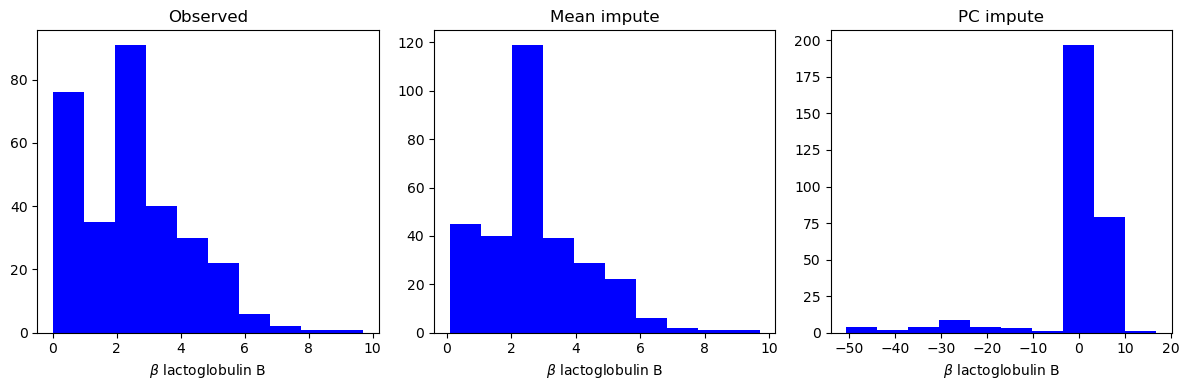

In [377]:
plt.figure(figsize=(12, 4))

# Plotting Observed histogram
plt.subplot(1, 3, 1)
plt.hist(traits.iloc[:, d-1], color='blue')
plt.title('Observed')
plt.xlabel(r'$\beta$ lactoglobulin B')

# Plotting Mean impute histogram
X_mean_imp = Xtilde.copy()
X_mean_imp[missing_indices, d-1] = xbar_betalb

plt.subplot(1, 3, 2)
plt.hist(X_mean_imp[:, d-1], color='blue')
plt.title('Mean impute')
plt.xlabel(r'$\beta$ lactoglobulin B')

# Plotting PC impute histogram
plt.subplot(1, 3, 3)
plt.hist(Xtilde[:, d-1], color='blue')
plt.title('PC impute')
plt.xlabel(r'$\beta$ lactoglobulin B')

# Adjusting subplot spacing
plt.tight_layout()

# Displaying the plots
plt.show()


In [378]:
np.sum(Xtilde[:, d-1] <= 0)

28

In [379]:
Xtilde_df = pd.DataFrame(Xtilde)
Xtilde_df.rename(columns={6: 'beta_LactB'}, inplace=True)

In [380]:
negBeta_ind = np.where(Xtilde[:, d-1] < 0)[0]
negBeta_ind


array([  7,  11,  24,  27,  33,  38,  42,  51,  60,  64,  89,  98, 133,
       193, 194, 204, 205, 206, 208, 216, 217, 229, 231, 233, 240, 242,
       257, 271], dtype=int64)

***Some values are negative! Will need to remove these for any further analysis, but there are still fewer than removing all 0 values.***

In [381]:
milk_imp = milk_df_2.drop(negBeta_ind)

* Dealing with 0 values of β Lactoglobulin B in three ways:
    * Deleting the rows with β Lactoglobulin B equal to 0
    * Imputing the 0 values of β Lactoglobulin B using observed mean
    * 0 values of β Lactoglobulin B values are imputed using principal components analysis
* Then running Principal Component Regression to predict β Lactoglobulin B values from the MIR spectra and comparing the three. 

In [382]:

n_splits = 10
RMSE_delete = np.zeros(n_splits)
RMSE_mean = np.zeros(n_splits)
RMSE_imp = np.zeros(n_splits)

for i in range(n_splits):
    test_ind = np.random.choice(milk_imp.index, size=round(milk_imp.shape[0] / 3), replace=False)
    dat_test = milk_imp.loc[test_ind, :]
    test_ind_zero = dat_test[dat_test["betaLactB"] == 0].index
    dat_test = dat_test.drop(test_ind_zero)
    
    dat_train = milk_imp.drop(test_ind)
    train_ind_zero = dat_train[dat_train["betaLactB"] == 0].index
    
    
    
    #Partial Least Squares Regression (PLS-R) - Delete Zeros
    dat_train_delete = dat_train.drop(train_ind_zero)
    pcr_res = PLSRegression(n_components=10)
    pcr_res.fit(dat_train_delete.iloc[:, :531], dat_train_delete["betaLactB"])
    
    preds_delete = pcr_res.predict(dat_test.iloc[:,:531])
    RMSE_delete[i] = mean_squared_error(dat_test["betaLactB"], preds_delete, squared=False)
    
    #PLS-R - Mean Imputation
    dat_train.loc[train_ind_zero, "betaLactB"] = np.mean(dat_train.loc[dat_train['betaLactB']!=0, 'betaLactB'])

    pcr_res = PLSRegression(n_components=10)
    pcr_res.fit(dat_train.iloc[:, :531], dat_train["betaLactB"])
    preds_mean = pcr_res.predict(dat_test.iloc[:, :531])
    RMSE_mean[i] = mean_squared_error(dat_test["betaLactB"], preds_mean, squared=False)
    
    #PLS-R - Imputation with PCA
    dat_train.loc[train_ind_zero, "betaLactB"] = Xtilde_df.loc[train_ind_zero, "beta_LactB"]
    pcr_res = PLSRegression(n_components=10)
    
    pcr_res.fit(dat_train.iloc[:, :531], dat_train["betaLactB"])
    
    preds_imp = pcr_res.predict(dat_test.iloc[:, :531])
    RMSE_imp[i] = mean_squared_error(dat_test["betaLactB"], preds_imp, squared=False)
    

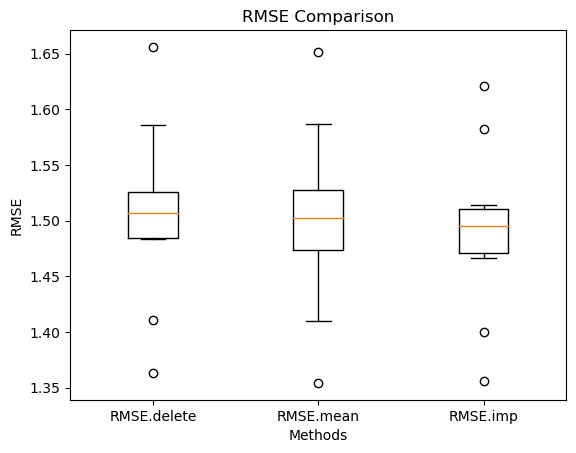

In [383]:
RMSEs = pd.DataFrame({'RMSE.delete': RMSE_delete, 'RMSE.mean': RMSE_mean, 'RMSE.imp': RMSE_imp})
plt.boxplot(RMSEs.values)
plt.xticks([1, 2, 3], RMSEs.columns)
plt.xlabel('Methods')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.show()


In [384]:
np.round(np.mean(RMSEs, axis=0), 3)


RMSE.delete    1.505
RMSE.mean      1.501
RMSE.imp       1.491
dtype: float64

In [385]:
np.round(np.std(RMSEs, axis=0), 3)

RMSE.delete    0.077
RMSE.mean      0.079
RMSE.imp       0.073
dtype: float64

***Not a very notable difference in mean RMSE, but variation is lower when values are PC imputed.***

***Overall learning is that handling missing data needs careful consideration in the context of multivariate data.***
